In [40]:
import cv2
from numpy import array

def read_and_process_images(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread("data21class/" + str(image), cv2.IMREAD_GRAYSCALE), (50,50), interpolation = cv2.INTER_CUBIC))
        
        if 'apple' in str(image):
            y.append(0)
        
        if 'ball' in str(image):
            y.append(1)
    
        if 'banana' in str(image):
            y.append(2)
        
        if 'bowl' in str(image):
            y.append(3)
            
        if 'calculator' in str(image):
            y.append(4)
        
        if 'cell' in str(image):
            y.append(5)
        
        if 'flashlight' in str(image):
            y.append(6)
        
        if 'food' in str(image):
            y.append(7)
        
        if 'garlic' in str(image):
            y.append(8)
            
        if 'instant' in str(image):
            y.append(9)
            
        if 'kleenex' in str(image):
            y.append(10)
            
        if 'lemon' in str(image):
            y.append(11)
    
        if 'lime' in str(image):
            y.append(12)
        
        if 'orange' in str(image):
            y.append(13)
        
        if 'plate' in str(image):
            y.append(14)
        
        if 'pliers' in str(image):
            y.append(15)
        
        if 'potato' in str(image):
            y.append(16)
            
        if 'scissors' in str(image):
            y.append(17)
        
        if 'shampoo' in str(image):
            y.append(18)
        
        if 'tomato' in str(image):
            y.append(19)
        
        if 'water' in str(image):
            y.append(20)
        
    return array(X),array(y)

In [41]:
file_names=[]


In [42]:
import os
dirListing = os.listdir("data21class")
for filename in dirListing:
    file_names.append(str(filename))

In [43]:
len(file_names)


5556

In [44]:
X, y = read_and_process_images(file_names)


In [45]:
X[0].shape


(50, 50)

Training data shape (5000, 50, 50, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 50, 50, 50)        1300      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 25, 25, 50)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 25, 25, 100)       125100    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 200)       500200    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7,

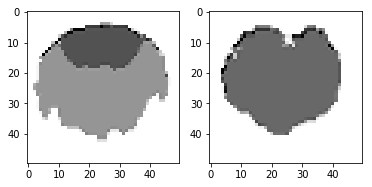

In [47]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets
import tensorflow as tf

start = 0 
middle = 5000
end = 5556
X_train = X[0:middle].reshape(X[0:middle].shape[0], 50,50,1)
y_train = tf.keras.utils.to_categorical(y[0:middle], 21)


X_val = X[middle:end].reshape(X[middle:end].shape[0], 50,50, 1)
y_val = tf.keras.utils.to_categorical(y[middle:end], 21)


from matplotlib import pyplot as plt
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(50,50), cmap=plt.cm.Greys);
ax2.imshow(X_train[5].reshape(50,50), cmap=plt.cm.Greys);


# Build your DNN, an example model is given for you.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, (5,5), padding='same', activation='relu', input_shape=(50,50,1)),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(100, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(400, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(400, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(200, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
])

model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


In [57]:
import numpy as np

def replaceRandom(temp, num):
    shape = temp.shape       
    temp = temp.flatten() 
    vval = np.max(temp)
    inds = np.random.choice(temp.size, size=num)   
    temp[inds] = np.full(num, vval)        
    temp = temp.reshape(shape)                     
    return temp
    

X_train = replaceRandom(X_train,1000)

X_val = replaceRandom(X_val,100)

In [58]:
hist1 = model.fit(X_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 5000 samples, validate on 556 samples
Epoch 1/10
5000/5000 [==============================] - 51s 10ms/sample - loss: 0.2253 - acc: 0.9160 - val_loss: 0.2626 - val_acc: 0.8939
Epoch 2/10
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.1993 - acc: 0.9274 - val_loss: 0.4141 - val_acc: 0.8777
Epoch 3/10
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.1877 - acc: 0.9326 - val_loss: 0.3146 - val_acc: 0.8903
Epoch 4/10
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.1691 - acc: 0.9344 - val_loss: 0.3513 - val_acc: 0.8903
Epoch 5/10
5000/5000 [==============================] - 49s 10ms/sample - loss: 0.1896 - acc: 0.9300 - val_loss: 0.3181 - val_acc: 0.8993
Epoch 6/10
5000/5000 [==============================] - 50s 10ms/sample - loss: 0.1395 - acc: 0.9486 - val_loss: 0.2248 - val_acc: 0.9245
Epoch 7/10
5000/5000 [==============================] - 50s 10ms/sample - loss: 0.1203 - acc: 0.9542 - val_loss: 0.3441 - val

In [ ]:
predictions = model.predict(X_val.reshape(X_val.shape[0], 50, 50,1))

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_val.argmax(axis=1), predictions.argmax(axis=1))

Text(0, 0.5, 'Test accuracy')

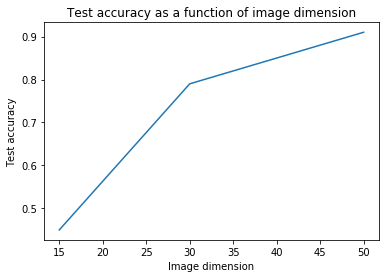

In [39]:
import matplotlib.pyplot as plt
dims = [15,30,50]
traind = [0.44,0.83,0.91]
testd = [0.45, 0.79, 0.91]
plt.plot(dims,testd)
plt.title("Test accuracy as a function of image dimension")
plt.xlabel("Image dimension")
plt.ylabel("Test accuracy")

In [ ]:
textlist = ['apple','ball','banana','bowl','calculator','cell','flashlight','food','garlic','instant','kleenex','lemon','lime','orange','plate','pliers','potato','scissors','shampoo','tomato','water']


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(matrix, index = [i for i in textlist],
                  columns = [i for i in textlist])
fig = plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
fig.savefig('confusion_212.png', dpi=1200)

# Training accuracy 91.26%
# Test accuracy 91.19%

In [ ]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[5].reshape(50,50), cmap=plt.cm.Greys);
ax2.imshow(X_train[9].reshape(50,50), cmap=plt.cm.Greys);


In [ ]:
textlist = ['potato', 'scissors', 'shampoo', 'tomato', 'water']

In [ ]:
matrix = [[29,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0],
       [ 0,  0, 61,  0,  0],
       [ 0,  0,  0, 39,  1],
       [ 0,  0,  0,  0, 66]]
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(matrix, index = [i for i in textlist],
                  columns = [i for i in textlist])
fig = plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
fig.savefig('confusion_21.png', dpi=1200)